In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
%matplotlib inline

# ## Data Preprocessing and Cleaning
We begin by importing the data and examining the columns.

In [115]:
data = pd.read_csv('dat/online_shoppers_intention.csv.gz', compression='gzip')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We can see that the data is composed of 12330 entries (rows), and 18 variables (columns). There are no missing values. The column 'Month' is a categorical variable that we will use to split the dataset, the columns 'Administrative', 'Informational', 'ProductRelated', 'Browser', 'OperatingSystems' and 'Region' are categorical numerical variables (discrete variables). The columns 'VisitorType', 'Weekend' and the target variable 'Revenue' are categorical variables (of Boolean type) that should be transformed to numerical variables before we can use them in our model (to be done later). The rest of the columns are numeric with continuous (float) values. The data needs no cleaning. (Check for duplicates?)

In [9]:
disc_cat_cols =  ['Administrative', 'Informational', 'ProductRelated', 'Browser', 'Region','OperatingSystems', 'TrafficType']
non_num_cat_cols = ['VisitorType', 'Weekend', 'Revenue', 'Month']
continuous_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
len(disc_cat_cols) + len(non_num_cat_cols) + len(continuous_cols) == 18

True

## Data Exploration

### Univariate Analysis
For the numerical features, we compute and visualize the number of unique values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'SpecialDay'),
  Text(1, 0, 'OperatingSystems'),
  Text(2, 0, 'Region'),
  Text(3, 0, 'Browser'),
  Text(4, 0, 'Informational'),
  Text(5, 0, 'TrafficType'),
  Text(6, 0, 'Administrative'),
  Text(7, 0, 'ProductRelated'),
  Text(8, 0, 'Informational_Duration'),
  Text(9, 0, 'BounceRates'),
  Text(10, 0, 'PageValues'),
  Text(11, 0, 'Administrative_Duration'),
  Text(12, 0, 'ExitRates'),
  Text(13, 0, 'ProductRelated_Duration')])

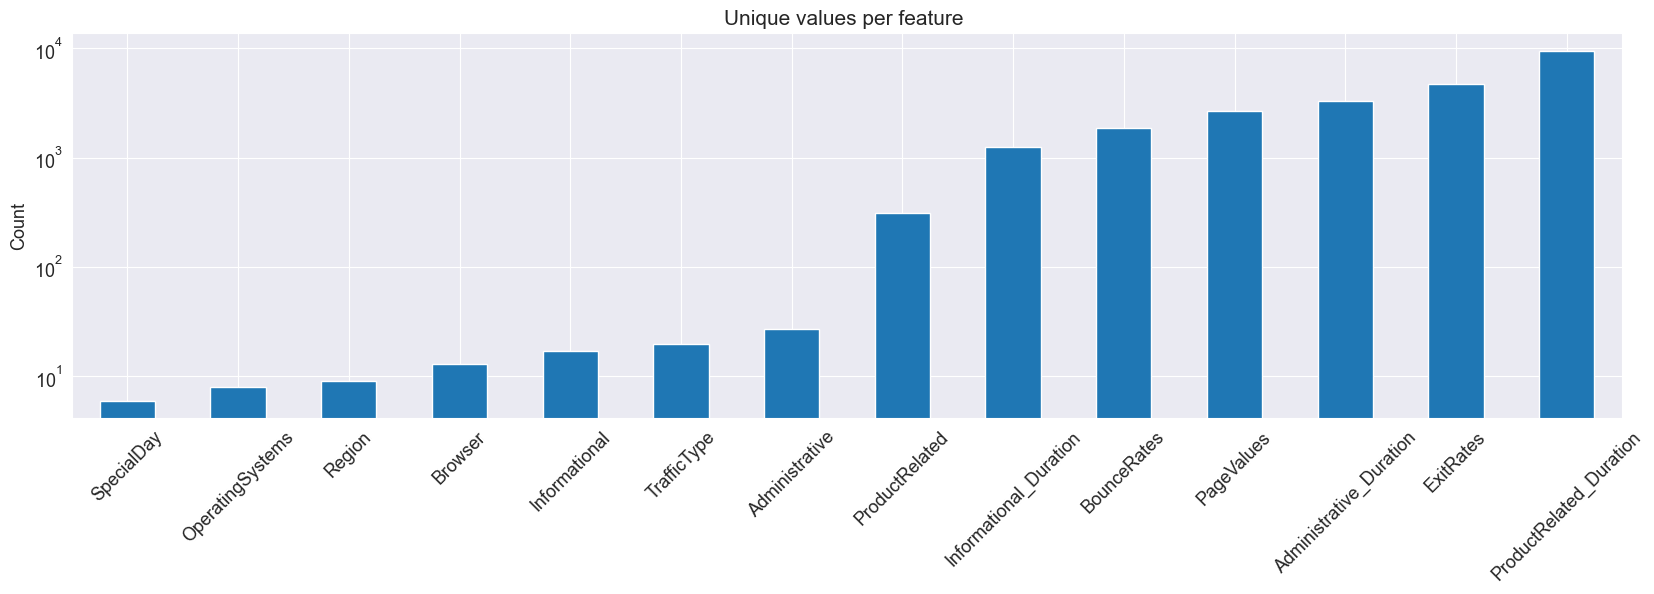

In [10]:
unique_values = data.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(20, 5))
plt.title('Unique values per feature ', fontsize=15)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

Next we compute some basic descriptive statistics of the numerical variables.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


We will now take a look at the distribution of the categorical variables:

(array([0, 1, 2]),
 [Text(0, 0, 'Returning_Visitor'),
  Text(1, 0, 'New_Visitor'),
  Text(2, 0, 'Other')])

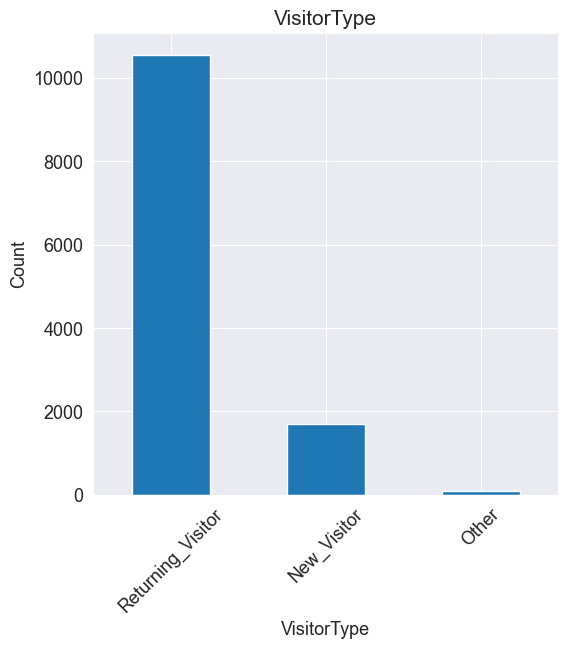

In [12]:
data['VisitorType'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('VisitorType', fontsize=15)
plt.xlabel('VisitorType', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

'VisitorType' has three unique values, 'Returning_Visitor', 'New Visitor' and 'Other'. The Returning visitors are many times more present in the dataset. We will now visualize the distribution of the 'Weekend' variable.

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

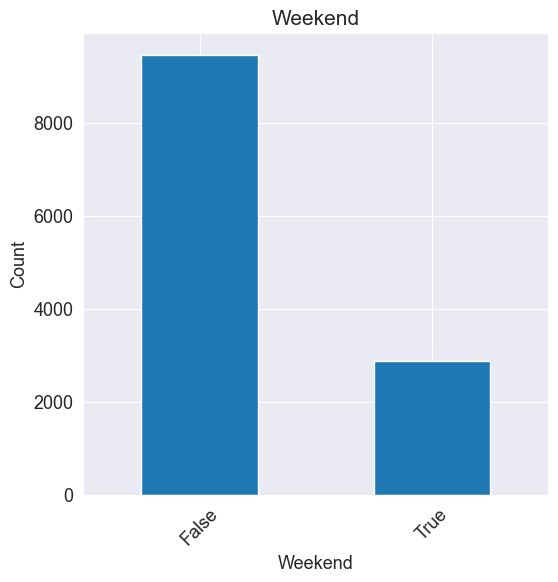

In [13]:
# Visualize the distribution of the 'Weekend' variable
data['Weekend'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Weekend', fontsize=15)
plt.xlabel('Weekend', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

 Weekend' has two unique values, 'Weekend' and 'Weekday'. Here we see that most of the visitors access the website on weekdays.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '1'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '8'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '5')])

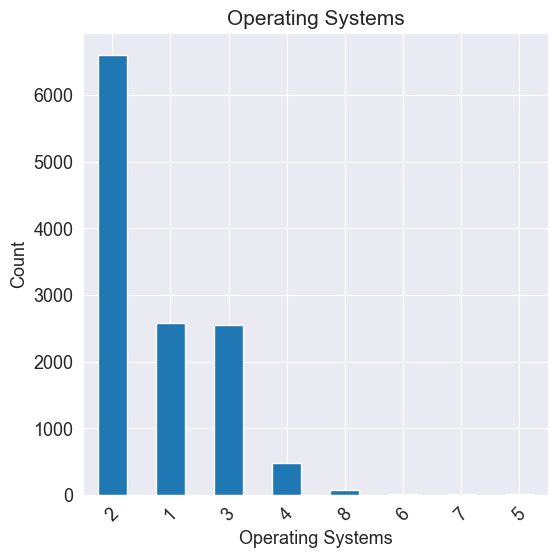

In [14]:
# Visualize the distribution of the 'OperatingSystems' variable

data['OperatingSystems'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Operating Systems', fontsize=15 )
plt.title('Operating Systems', fontsize=15)
plt.xlabel('Operating Systems', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

The operating system with the label '2' is the most frequent in the dataset. We will now visualize the distribution of the 'Browser' variable.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2'),
  Text(1, 0, '1'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '10'),
  Text(6, 0, '8'),
  Text(7, 0, '3'),
  Text(8, 0, '13'),
  Text(9, 0, '7'),
  Text(10, 0, '12'),
  Text(11, 0, '11'),
  Text(12, 0, '9')])

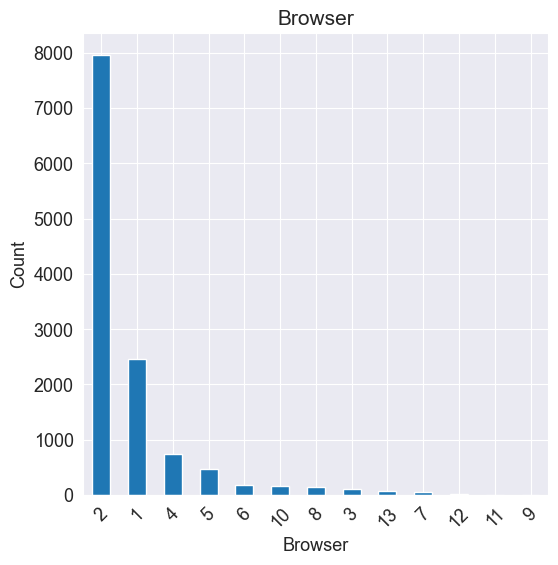

In [15]:
# Visualize the distribution of the 'Browser' variable
data['Browser'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Browser', fontsize=15 )
plt.xlabel('Browser', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

Here we see that the most frequent browser is the one labeled as '2'.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'May'),
  Text(1, 0, 'Nov'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Dec'),
  Text(4, 0, 'Oct'),
  Text(5, 0, 'Sep'),
  Text(6, 0, 'Aug'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'June'),
  Text(9, 0, 'Feb')])

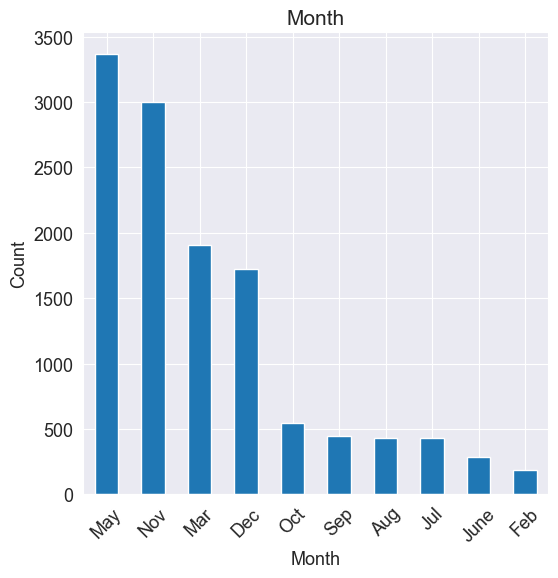

In [16]:
# Visualize the distribution of the 'Month' variable
data['Month'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Month', fontsize=15 )
plt.xlabel('Month', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

We also see that the data is imbalanced with respect to the month column.

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'ProductRelated'}>],
       [<AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>],
       [<AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

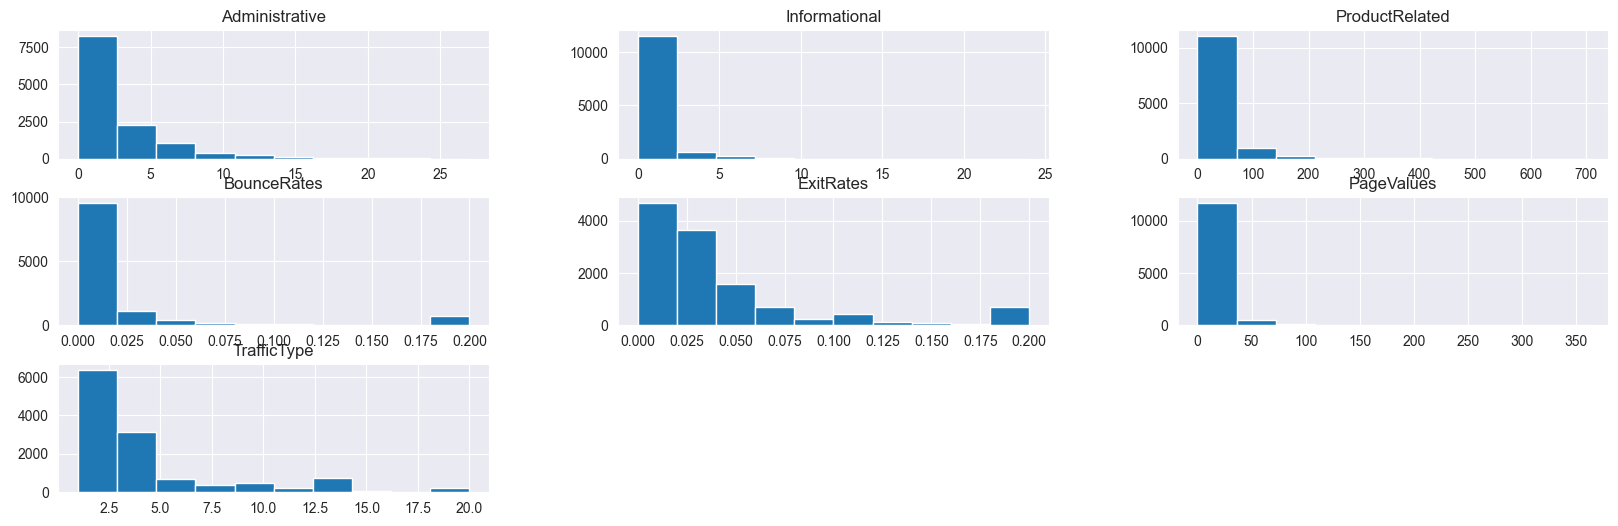

In [21]:
data2 = data[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues','TrafficType']]
data2.hist(figsize=(20,6))

Similarly for the other categorical variables, the distribution is imbalanced and localized in only a few values. It appears that most of the categorical variables are exponentially distributed.

Finally we will visualize the distribution of the 'Revenue' (target variable).

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

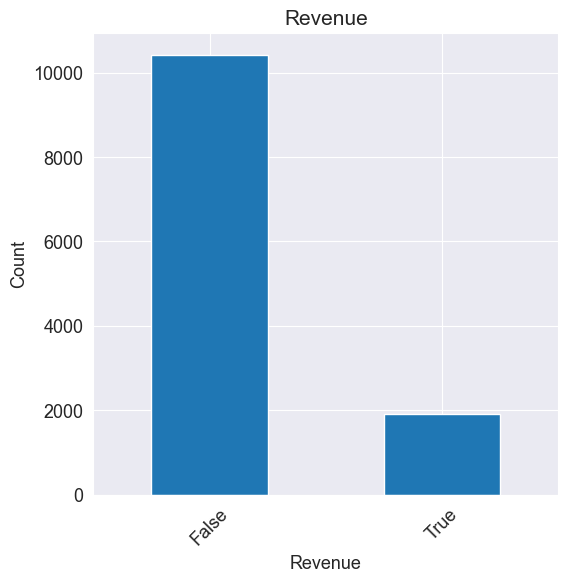

In [105]:
data['Revenue'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Revenue', fontsize=15 )
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation = 45)

## Bivariate Analysis and Feature Engineering

To begin our bivariate analysis we compute a correlation plot. Since this is only possible when the variables are numerical, we need to convert the categorical variables.
The categorical variables that only take a small number of numerical values should be one-hot encoded. There are also categorical variables that take a large number of discrete values, but these cannot be one-hot encoded because the dataset size would be too large. The month variable will only be used to split the dataset, so it can be converted using a label encoding. Since the values in the 'Month' variable in the test and train sets do not overlap, we can drop this variable too from the train and test datasets (it will have no effect).

The 'Revenue' variable will be used as the target variable, so it does not need to be converted.

We use the one hot encoding on the variables with a value count smaller or equal to 10.

In [116]:
# Convert the 'Month' variable to a label encoding and split the dataset into train and test sets
data.Month = data.Month.replace({'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
df_train = data[data['Month'] >= 6]
df_test = data[data['Month'] < 4]

X_train = df_train.drop(['Revenue'], axis=1).drop(['Month'], axis=1)
X_test = df_test.drop(['Revenue'], axis=1).drop(['Month'], axis=1)
y_train = df_train['Revenue']
y_test = df_test['Revenue']

X_train.shape, X_test.shape



((6875, 16), (2091, 16))

In [117]:
# One hot encoding of the categorical variables
disc_cat_cols =  ['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType']
ohe_cols = ['VisitorType', 'Weekend', 'OperatingSystems', 'Region']
#ohe_cols = disc_cat_cols + non_num_cat_cols[0:2]
numeric_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']

def preprocess_data(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
    X_train_enc =  ohe.fit_transform(X_train[ohe_cols])
    X_test_enc = ohe.transform(X_test[ohe_cols])
    new_cat_cols = list(ohe.get_feature_names_out(input_features = ohe_cols))

    scaler = MinMaxScaler()
    X_train_num = scaler.fit_transform(X_train[numeric_cols])
    X_test_num = scaler.transform(X_test[numeric_cols])

    X_train_final = np.hstack((X_train_num,X_train_enc))
    X_test_final = np.hstack((X_test_num, X_test_enc))

    return X_train_final, X_test_final, new_cat_cols

X_train, X_test, new_cat_cols = preprocess_data(X_train, X_test)
X_train.shape, X_test.shape

((6875, 29), (2091, 29))

In [118]:
# Convert back to pandas dataframe
X_train_df = pd.DataFrame(X_train, columns = numeric_cols + new_cat_cols)
X_test_df = pd.DataFrame(X_test, columns = numeric_cols + new_cat_cols)

X_train_df.shape, X_test_df.shape

((6875, 29), (2091, 29))

Next we compute the correlation matrix between the feature variables and visualize it.

/var/folders/yr/wjd7fsqn2zv8rd2hgfd614yh0000gn/T/ipykernel_2624/4152539647.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

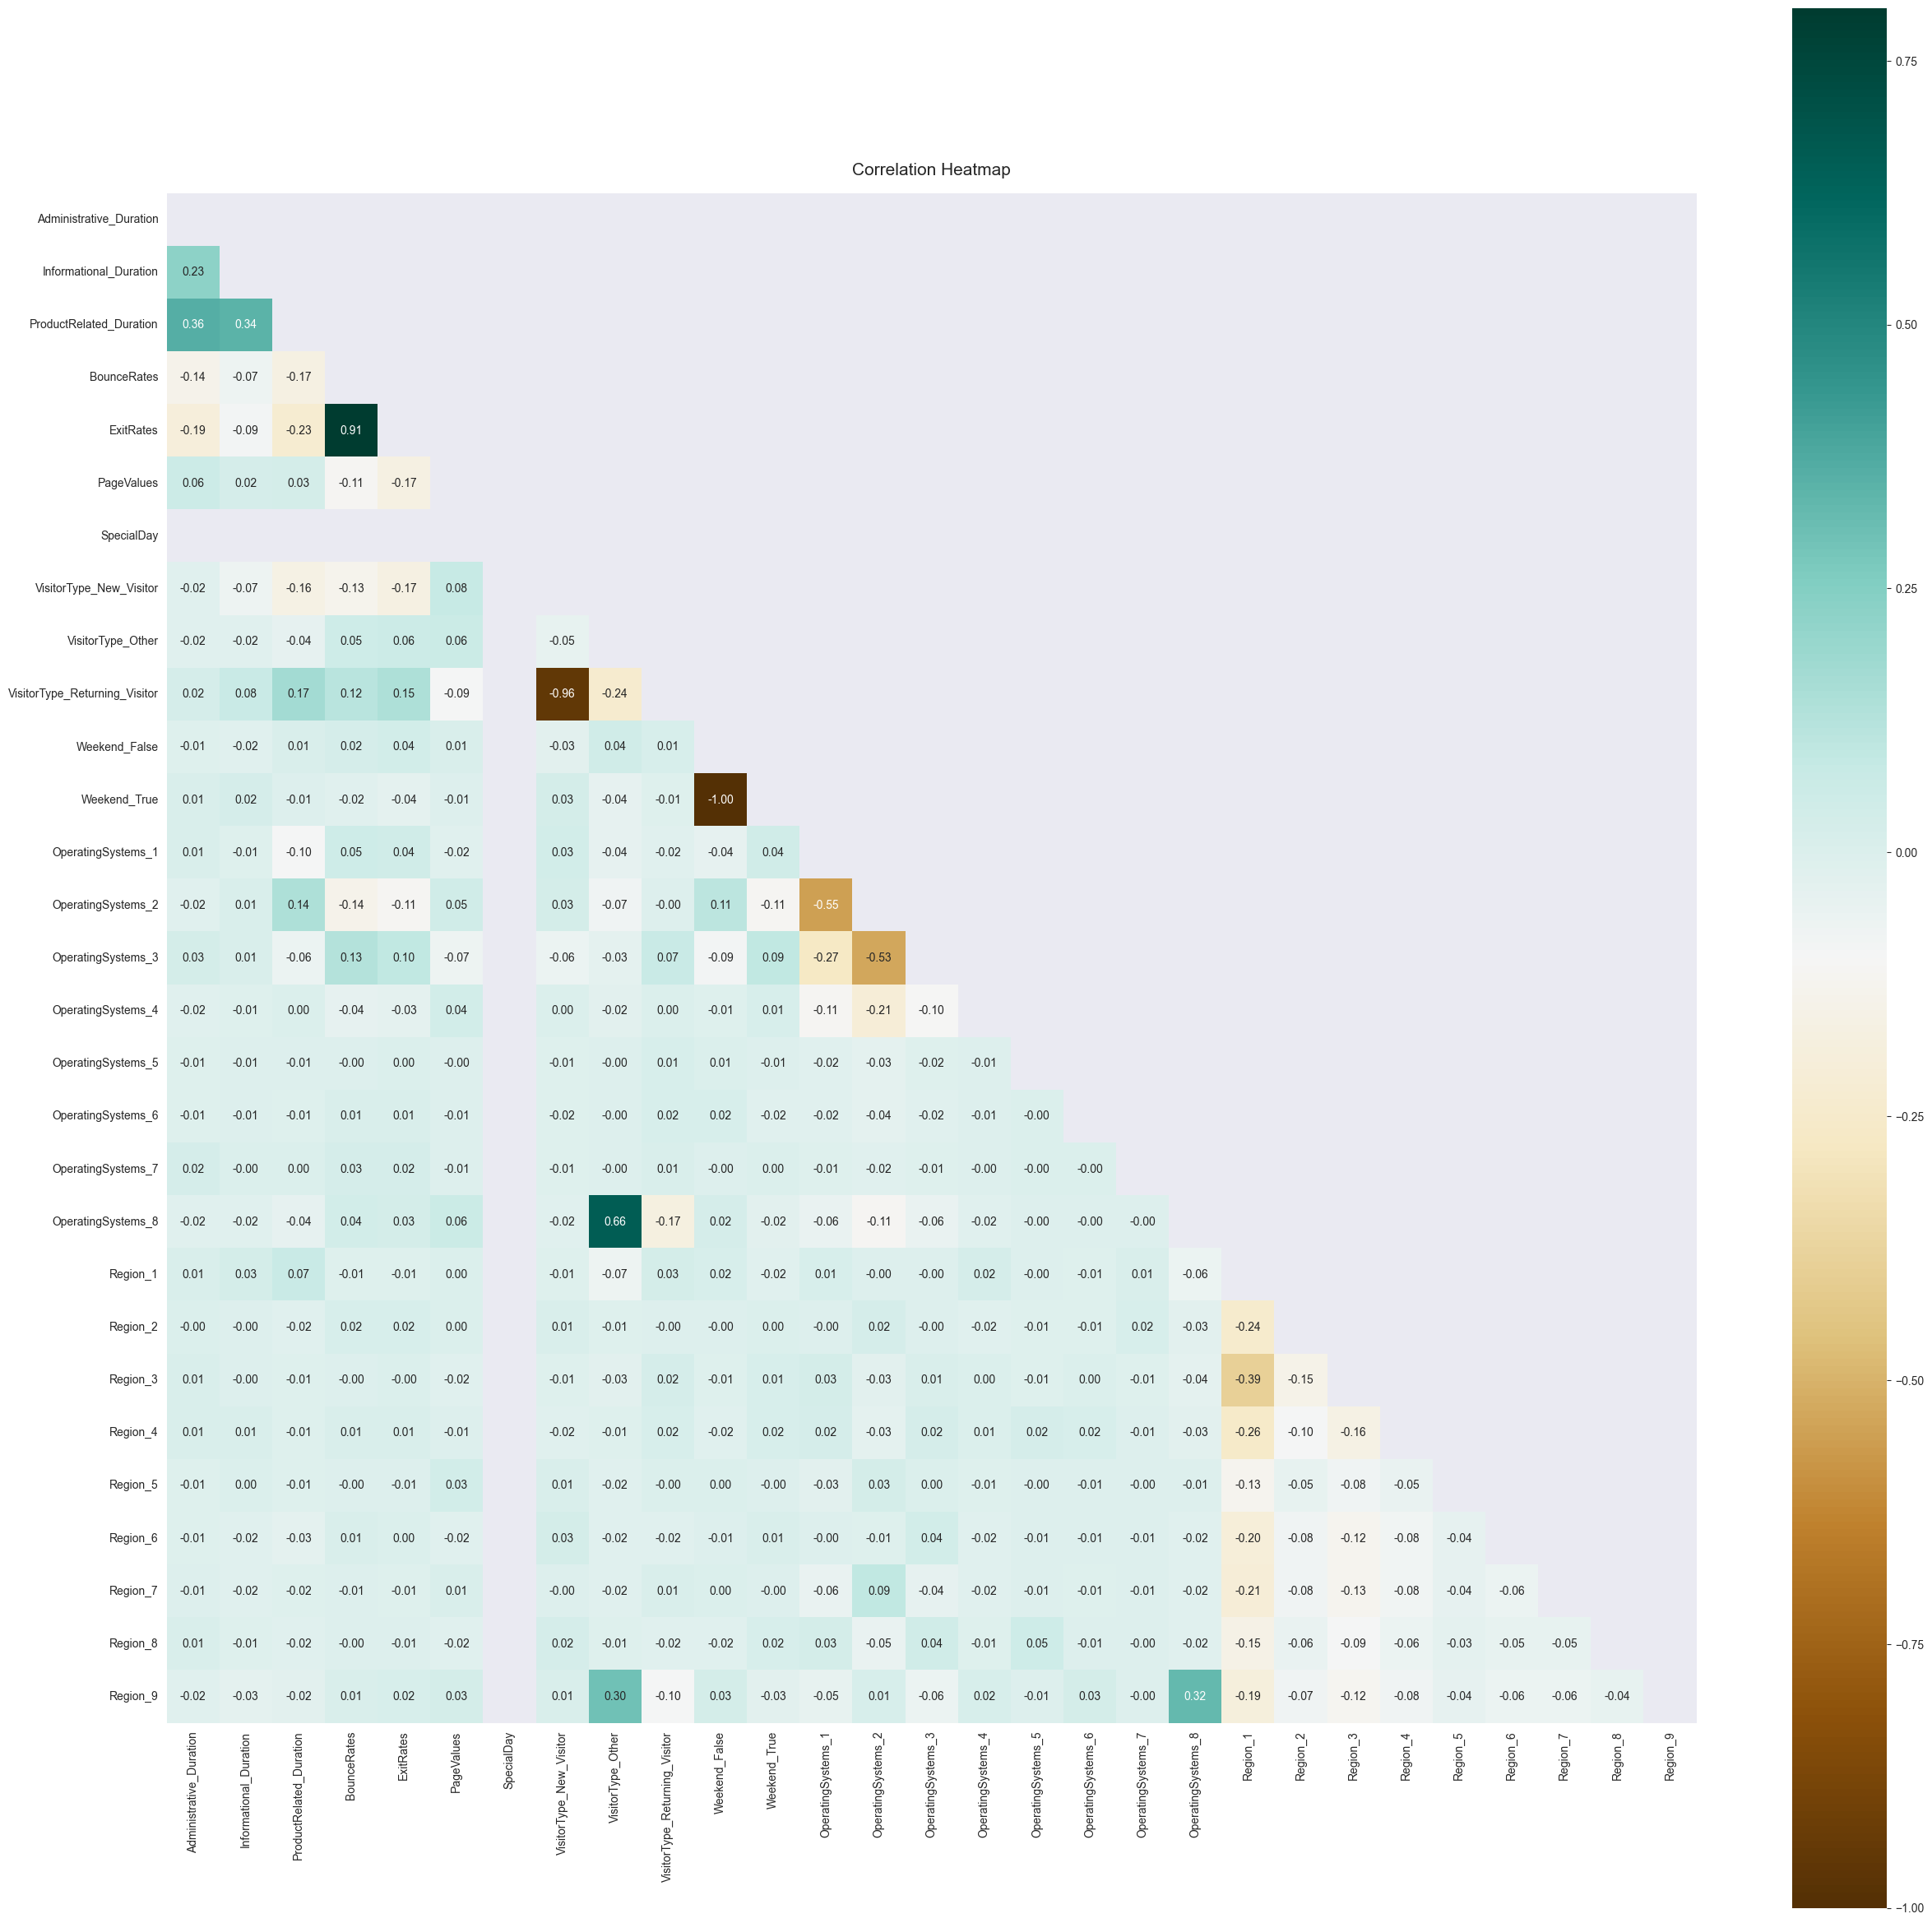

In [119]:
# Compute the correlation matrix and plot the triangular heatmap
corr = X_train_df.corr()
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap= sns.heatmap(corr, mask=mask, cmap='BrBG', vmax=.8, square=True, annot=True, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontsize=15, pad = 16)

This analysis suggests that some pairs of variables are correlated, and one of them among each pair should be dropped: the pair VisitorType_New_Visitor and VisitorType_Returning_Visitor, and the pair Weekend_true and Weekend_False, and the pair ExitRates and BounceRates. The first two resulted from the one-hot encoding of the categorical variables, and the third pair resulted from the fact that the two variables are highly correlated.

In order to decide which variables to drop we compute the correlations with our target variable.

In [121]:
# Add the target variable to the dataframe
X_train_df['Revenue'] = np.asarray(y_train)
# Compute the correlation with respect to the target variable
X_train_df.corr()[['Revenue']].sort_values(by='Revenue', ascending=False)
# Drop the target variable from the dataframe
X_train_df.drop('Revenue', axis=1, inplace=True)


We  conclude from the correlation between the target variable and the rest of the variables that many of them are negligibly correlated with the target variable, therefore we drop the ones with a correlation coefficient smaller in absolute value than 0.05:

`'Region_1', 'Region_2', 'OperatingSystems_4', 'Weekend_True', 'OperatingSystems_7', 'OperatingSystems_8', 'Region_5', 'OperatingSystems_5', 'VisitorType_Other', 'Region_7', 'Region_4', 'Weekend_False', 'Region_9', 'Region_6', 'Region_8'`.

Most of these variables resulted from the one-hot encoding and can be grouped suggesting that neither the region, operating systems or the weekday of the visit is relevant for the analysis. For consistency, we also drop the `'OperatingSystems_3'` variable, and from the pair correlation analysis we did before we conclude that the `'VisitorType_Returning_Visitor'` variable can be dropped because it is highly correlated with `'VisitorType_New_Visitor'`

In [112]:
drop_cols = ['Region_1', 'Region_2', 'OperatingSystems_4', 'Weekend_True', 'OperatingSystems_7', 'OperatingSystems_8', 'Region_5', 'OperatingSystems_5', 'VisitorType_Other', 'Region_7', 'Region_4', 'Weekend_False', 'Region_9', 'Region_6', 'Region_8', 'VisitorType_Returning_Visitor']

In [97]:
X_train_df['SpecialDay'].value_counts()

0.0    6875
Name: SpecialDay, dtype: int64

The variable 'SpecialDay' has constant value in the train set, so it should be dropped in both the train and test sets.

In [122]:
drop_cols.append('SpecialDay')
X_train_df.drop(drop_cols, axis=1, inplace=True)
X_test_df.drop(drop_cols, axis=1, inplace=True)

X_train_df.shape, X_test_df.shape


((6875, 12), (2091, 12))

## Model Fitting and Analysis

We will now fit a logistic regression model to the data and evaluate its performance.

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score as accuracy, recall_score as recall,  precision_score as precision,  f1_score, classification_report)
# Fit the model
lr_model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, class_weight='balanced').fit(X_train_df, y_train)
lr_pred = lr_model.predict(X_test_df)

Next, we report the performance of the model on the test set, using the confusion matrix and the classification metrics.

In [ ]:
#print(confusion_matrix(y_test, lr_pred))

In [154]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.98      0.91      0.95      1896
        True       0.49      0.82      0.61       195

    accuracy                           0.90      2091
   macro avg       0.74      0.86      0.78      2091
weighted avg       0.93      0.90      0.91      2091



In [131]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))

accuracy: 0.9043519846963175
precision: 0.49226006191950467
recall: 0.8153846153846154
f1 score: 0.6138996138996139


In [ ]:
# Plot the ROC curve

Next we instantiate, fit and evaluate a gradient boosting classifier model.

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(random_state=0, max_depth=5, n_estimators=100, learning_rate=0.1, max_features=None)
gbt_model.fit(X_train_df, y_train)
gbt_pred = gbt_model.predict(X_test_df)

In [157]:
print(classification_report(y_test, gbt_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1896
        True       0.71      0.68      0.69       195

    accuracy                           0.94      2091
   macro avg       0.84      0.82      0.83      2091
weighted avg       0.94      0.94      0.94      2091

